# D209 Data Mining I Performance Assessment Task 1
By Matthew Heino

### Purpose:
This is a Jupyter Notebook for the D209 assessment for Data Mining I.  This notebook will be used in conjunction with a written document to explore data.  Concepts that will be explored in this notebook will be:
- Creation of a KNN model
- Data preparation 
- Identifying independent and dependent variables that are applicable to a question.
- Data transformation, transforming data into a form that cn be used on a linear regression.

**Note:** Code that has references uses the APA citation can be found in the Word document that accompanies this Jupyter Notebook.

## Pre-assessment tasks:
        
        1. Read the data from the CSV.
        2. Get a feel for what the data contains. Print the first five 
        rows of the data frame.
        3. Print some information about the dataframe. 

In [1]:
import math
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# CSV columns that contain the desired features for the analysis.
feature_cols =['Age','HighBlood','Stroke','Complication_risk'
               ,'Overweight','Diabetes','Hyperlipidemia'
               ,'Asthma' ,'Initial_days', 'ReAdmis']

medical_df = pd.read_csv('medical_clean.csv', usecols=feature_cols)

# Print the first five rows of the dataframe
print(medical_df.head(5))

# print some information about the dataframe.
print("Medical dataframe information: \n" , medical_df.info())

   Age ReAdmis HighBlood Stroke Complication_risk Overweight Diabetes  \
0   53      No       Yes     No            Medium         No      Yes   
1   51      No       Yes     No              High        Yes       No   
2   53      No       Yes     No            Medium        Yes      Yes   
3   78      No        No    Yes            Medium         No       No   
4   22      No        No     No               Low         No       No   

  Hyperlipidemia Asthma  Initial_days  
0             No    Yes     10.585770  
1             No     No     15.129562  
2             No     No      4.772177  
3             No    Yes      1.714879  
4            Yes     No      1.254807  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  int64  
 1   ReAdmis            10000 non-null  object 
 2   HighBlood       

# A. Research Question.
1. The research question will be discussed in the written document that accompanies this Jupyter Notebook.  
2. The goals of the analysis will be be discussed in the written document.

# B. Justification 
All B sections will be found in the written document that accompanies this Jupyter Notebook.

# C Data Preparation 
This section will contain the code that will be used to clean and prepare the data that will be used in subsequent sections of this assessment.  Any questions that require text based answers will be included in the accompanying document.

Code included in this section:
 - Code to look for duplicates in the dataframe
 - Code to look for missing values
 - Code for looking for the outliers that may be contained in the dataframe.
 - Code for creating summary statistics for the features.

## C1 & C2.  
These sections can be found in the Word documnet that accompanies this Jupiter Notebook.

## C3. Steps used to Prepare the Data.

### Looking for duplicates in the dataframe. 


In [3]:
# Step 1. Check for duplicates in the dataset.
medical_dups = medical_df[medical_df.duplicated()]
print("Duplicated rows: \n",medical_dups)

Duplicated rows: 
 Empty DataFrame
Columns: [Age, ReAdmis, HighBlood, Stroke, Complication_risk, Overweight, Diabetes, Hyperlipidemia, Asthma, Initial_days]
Index: []


No duplicates were found!

### Step 2. Look for missing values. 

In [4]:
#Step 2
# Count the number of missing values for the dataframe.
# Check if there are missing values in dataset
print("\nAre there any missing values: ",medical_df.isnull().values.any())
print("\nTotal missing values: \n", medical_df.isnull().sum())


Are there any missing values:  False

Total missing values: 
 Age                  0
ReAdmis              0
HighBlood            0
Stroke               0
Complication_risk    0
Overweight           0
Diabetes             0
Hyperlipidemia       0
Asthma               0
Initial_days         0
dtype: int64


Display a visual of no missing values.

AxesSubplot(0.125,0.11;0.698618x0.77)


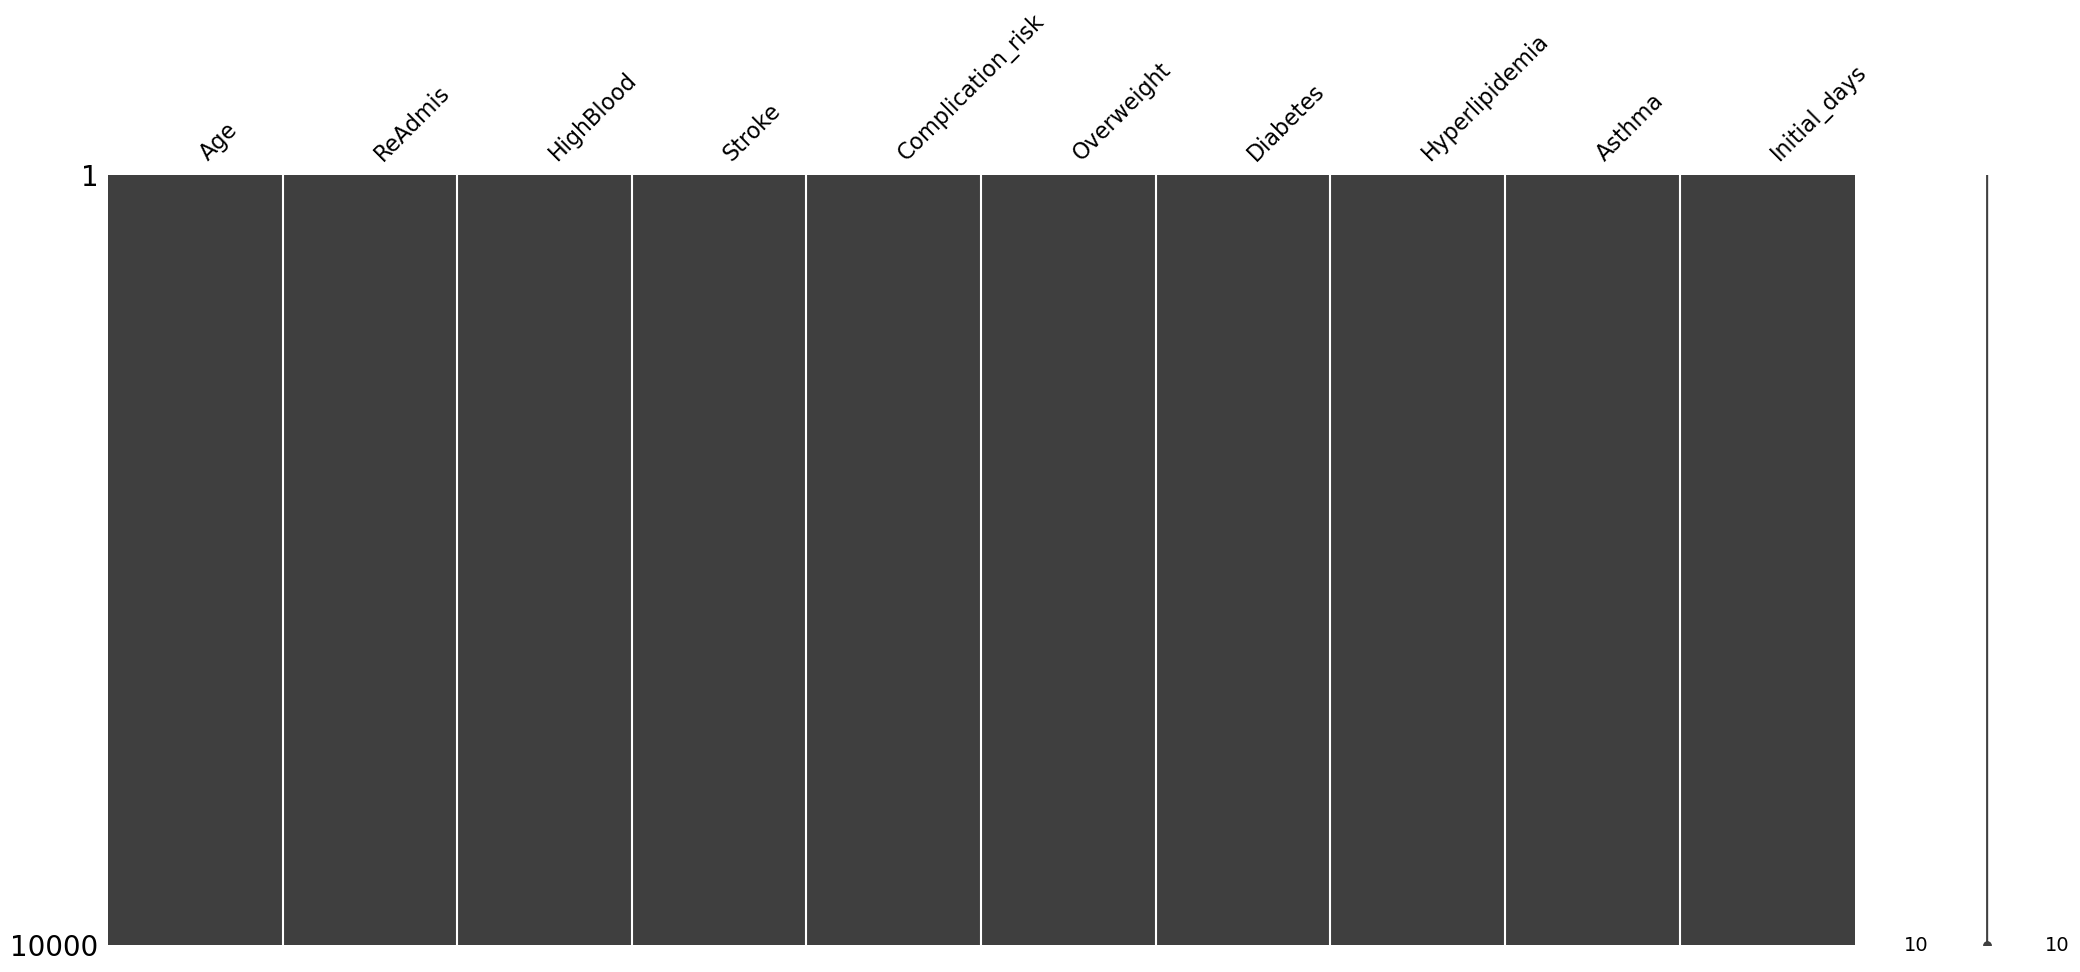

In [5]:
# Create a missing matrix using Missingno library.
print(msno.matrix(medical_df))

No missing values were found!

### Step 3. Look for outliers in the data set.
This step will be accomplished using a boxplot to look at the data that is contained in the continuous variables of of the dataset.

Variables that will be evaluated are:
- Age
- Initial_days

Method used to determine if the there are outliers will be the interquartile range method (IQR).  The IQR method was used in the data cleaning assessment and will be employed here.

**Note:** The code for this section is essentially the same that was used in previous assessments regarding data cleaning.

Desription of Age: 
 count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


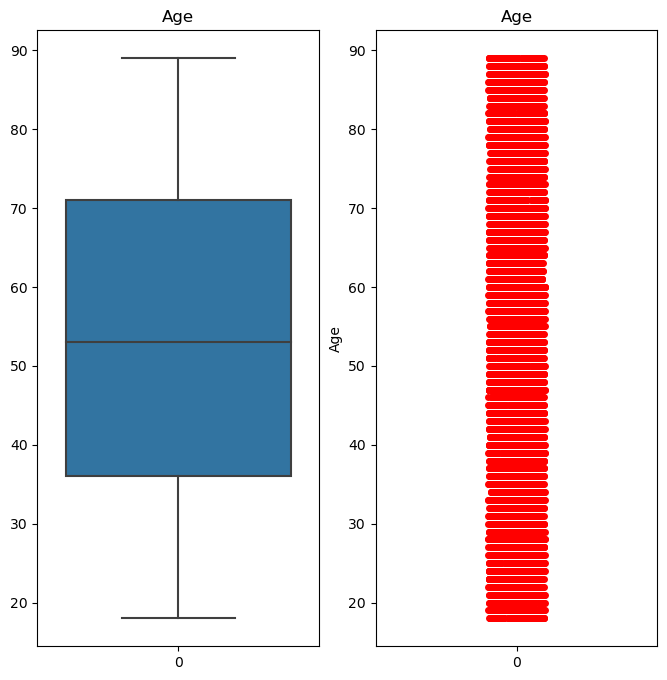

In [6]:
# Step 3 Look for outliers in the dataframe 
# Age

print('Desription of Age: \n', medical_df['Age'].describe())
fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['Age'], ax = ax1).set(title="Age")
sns.stripplot(data=medical_df['Age'], ax=ax2, color='red').set(title="Age")
plt.show()

Based on the boxplot, there are no outliers.  All data falls within the bounds of the boxplot.

### Step 5:  Look for oultiers in Initial Days


Desription of Initial Days: 
 count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64


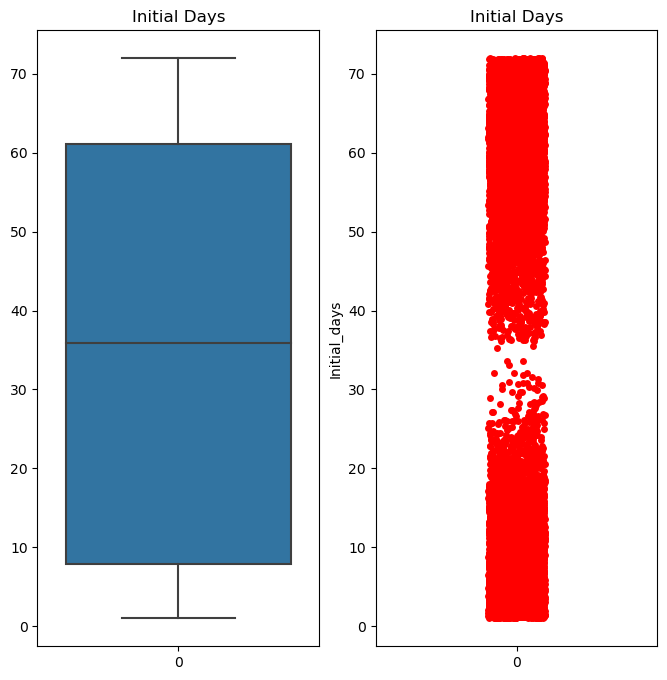

In [7]:
print('Desription of Initial Days: \n', medical_df['Initial_days'].describe())
fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['Initial_days'], ax = ax1).set(title="Initial Days")
sns.stripplot(data=medical_df['Initial_days'], ax=ax2, color='red').set(title="Initial Days")
plt.show()

Based on the boxplot, there are no outliers.  All data falls within the bounds of the boxplot.

##  Step 6: Summary Statistics for the Chosen Features
This section will display some of the statisitics for the features.  There is a section for both the continuous and the categorical features of the dataframe. 

### Continuous Variables
This section will display the summary statistics for the continuous variables for the chosen features.

In [8]:
# Summary Statistics for Features
medical_cont_cols = medical_df.select_dtypes(include='number').columns

for col_name in medical_cont_cols:
    print("\nThe summary statistics for: ", col_name)
    print(medical_df[col_name].describe())


The summary statistics for:  Age
count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

The summary statistics for:  Initial_days
count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64


### Categorical Variables

This section will display the summary statistics for the categorical variables for the chosen features.

In [9]:
medical_cat_cols = medical_df.select_dtypes(include='object').columns

for col_name in medical_cat_cols:
    print("\n\nThe summary statistics for ", col_name)
    print(medical_df[col_name].describe())
    print("\n",medical_df.groupby([col_name]).size())



The summary statistics for  ReAdmis
count     10000
unique        2
top          No
freq       6331
Name: ReAdmis, dtype: object

 ReAdmis
No     6331
Yes    3669
dtype: int64


The summary statistics for  HighBlood
count     10000
unique        2
top          No
freq       5910
Name: HighBlood, dtype: object

 HighBlood
No     5910
Yes    4090
dtype: int64


The summary statistics for  Stroke
count     10000
unique        2
top          No
freq       8007
Name: Stroke, dtype: object

 Stroke
No     8007
Yes    1993
dtype: int64


The summary statistics for  Complication_risk
count      10000
unique         3
top       Medium
freq        4517
Name: Complication_risk, dtype: object

 Complication_risk
High      3358
Low       2125
Medium    4517
dtype: int64


The summary statistics for  Overweight
count     10000
unique        2
top         Yes
freq       7094
Name: Overweight, dtype: object

 Overweight
No     2906
Yes    7094
dtype: int64


The summary statistics for  Diabetes
coun

## Step 7: Data Transformation
Encode the categorical variables using either map() or pandas get_dummies() methods.  
**Note:**  This was an experimentation into different ways to encode the categorical variables.

In [10]:
# C4 Transform the categorical variables.
medical_cats_cols = medical_df.select_dtypes(include='object').columns
yes_no_map ={"Yes": 1, "No": 0}

for name in medical_cats_cols:
    if len(medical_df[name].unique()) > 2:
        medical_df =   pd.get_dummies(medical_df
               ,columns = [name]
               ,drop_first = False,
               prefix = name
               )
    else:
        medical_df[name] = medical_df[name].map(yes_no_map)
        
print("\nMedical Info: ",medical_df.info())
print(medical_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10000 non-null  int64  
 1   ReAdmis                   10000 non-null  int64  
 2   HighBlood                 10000 non-null  int64  
 3   Stroke                    10000 non-null  int64  
 4   Overweight                10000 non-null  int64  
 5   Diabetes                  10000 non-null  int64  
 6   Hyperlipidemia            10000 non-null  int64  
 7   Asthma                    10000 non-null  int64  
 8   Initial_days              10000 non-null  float64
 9   Complication_risk_High    10000 non-null  uint8  
 10  Complication_risk_Low     10000 non-null  uint8  
 11  Complication_risk_Medium  10000 non-null  uint8  
dtypes: float64(1), int64(8), uint8(3)
memory usage: 732.5 KB

Medical Info:  None
   Age  ReAdmis  HighBlood  Stroke  Ove

The categorical values have been encoded to their numerical equivalents.

### Look for features that are the most important

Using SelectKbest to look for relevant features.  This will use the f_classif argument.

In [11]:
# split the data.
# Create a pandas frame for the X 
X = medical_df.drop(['ReAdmis'], axis=1)

# Create a pandas series for y.
y = medical_df['ReAdmis']

### Step 8: Scale Features 
This is to be able to use the SelectKBest.
Citation: (Sklearn.Preprocessing.MinMaxScaler, n.d.)

In [12]:
# Scale (transform the values in X).
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X)
                 , columns=X.columns)

print("The dataframe with the values scaled: \n ",X)

The dataframe with the values scaled: 
             Age  HighBlood  Stroke  Overweight  Diabetes  Hyperlipidemia  \
0     0.492958        1.0     0.0         0.0       1.0             0.0   
1     0.464789        1.0     0.0         1.0       0.0             0.0   
2     0.492958        1.0     0.0         1.0       1.0             0.0   
3     0.845070        0.0     1.0         0.0       0.0             0.0   
4     0.056338        0.0     0.0         0.0       0.0             1.0   
...        ...        ...     ...         ...       ...             ...   
9995  0.098592        1.0     0.0         0.0       0.0             0.0   
9996  0.971831        1.0     0.0         1.0       1.0             0.0   
9997  0.380282        1.0     0.0         1.0       0.0             0.0   
9998  0.352113        0.0     0.0         1.0       0.0             0.0   
9999  0.732394        0.0     0.0         1.0       0.0             1.0   

      Asthma  Initial_days  Complication_risk_High  Compli

### Step 9: SelectKBest
Use SelectKBest to get features to be used in the model.
Citation: (Sklearn.Feature_Selection.SelectKBest, n.d.)

In [13]:
# Select the best features. **************************************************
feat_sel = SelectKBest(f_classif, k='all')
feat_sel.fit_transform(X, y)

# Create a dataframewith the p-vlaues of the features.
# in sorted order
feat_pval = pd.DataFrame({'Feature': X.columns
                          , 'p_value' : feat_sel.pvalues_}).sort_values('p_value')

# Could not find features with a p-value less than or equal to 0.05.
selected_features = feat_pval[feat_pval['p_value'] < .15]

new_med_df = X[selected_features['Feature'].values].copy()

# add the Readmis column.
new_med_df.loc[:, 'ReAdmis']  = y

print("new x: \n", new_med_df)

new x: 
       Initial_days  Asthma       Age  ReAdmis
0         0.135022     1.0  0.492958        0
1         0.199037     0.0  0.464789        0
2         0.053117     0.0  0.492958        0
3         0.010044     1.0  0.845070        0
4         0.003562     0.0  0.056338        0
...            ...     ...       ...      ...
9995      0.712308     0.0  0.098592        0
9996      0.953321     1.0  0.971831        1
9997      0.974256     0.0  0.380282        1
9998      0.878492     0.0  0.352113        1
9999      0.984067     0.0  0.732394        1

[10000 rows x 4 columns]


## C4. Copy of Cleaned Dataset.
This is the code that is used to create the clean dataset.  It will saved to file and will be read from to create the model. 

In [14]:
new_med_df.to_csv('Heino_Cleaned_Medical_Task_1.csv', index = False, header = True)

## D1. Split the Cleaned Dataset.
Tasks:
- Read in the cleaned data set into a new frame.
- Split the datset into the train and test samples.

In [15]:
#Read the cleaned file into a new dataframe.
medical_mod_df = pd.read_csv('Heino_Cleaned_Medical_Task_1.csv')
print(medical_mod_df)

      Initial_days  Asthma       Age  ReAdmis
0         0.135022     1.0  0.492958        0
1         0.199037     0.0  0.464789        0
2         0.053117     0.0  0.492958        0
3         0.010044     1.0  0.845070        0
4         0.003562     0.0  0.056338        0
...            ...     ...       ...      ...
9995      0.712308     0.0  0.098592        0
9996      0.953321     1.0  0.971831        1
9997      0.974256     0.0  0.380282        1
9998      0.878492     0.0  0.352113        1
9999      0.984067     0.0  0.732394        1

[10000 rows x 4 columns]


### Splitting the data into the training and test sets.

In [16]:
X = medical_mod_df.iloc[:, : -1]
y = medical_mod_df['ReAdmis']

# Split the data.
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , train_size=0.8
                                                    , test_size=0.2
                                                    ,random_state=1911
                                                    ,stratify=y)

print(X.head())

   Initial_days  Asthma       Age
0      0.135022     1.0  0.492958
1      0.199037     0.0  0.464789
2      0.053117     0.0  0.492958
3      0.010044     1.0  0.845070
4      0.003562     0.0  0.056338


#### Save the split data into the appropriate files.

In [17]:
# Save the sets to the CSV files.
X_train.to_csv('Heino_X_train_Task_1.csv', index = False, header = True)
X_test.to_csv('Heino_X_test_Task_1.csv', index = False, header = True)
y_train.to_csv('Heino_y_train_Task_1.csv', index = False, header = True) 
y_test.to_csv('Heino_y_test_Task_1.csv', index = False, header = True)

## D2. Description of the Analysis Technique.

In this section, the model will tuned and created.  The tuning will be done using GridSearchCV.  This class will run through a parameter list that is passed as an argument.  This class will run through this list of parameters trying different combinations of variables to get the right parameters to yield the best model.

In [18]:
# Using GridSearch to tune the model.
# Setup the parameters dictionary.
train_size = round(math.sqrt(X_train.shape[0]))

#print(train_size)
param_grid= {'n_neighbors' : np.arange(1, train_size)}

# Create the KNN classifier object
knn = KNeighborsClassifier()

# Create the GridSearchCV object.
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

# Fit the training data to the model.
knn_gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88])})

In [20]:
# Print the best params for the model
print(knn_gscv.best_params_)

# Print the best score for the model.
print(knn_gscv.best_score_)

{'n_neighbors': 42}
0.9782500000000001


### Create the KNN model with the best K value.
Using the K that was determined using GridSearchCV.  The best value for k was 42.  The model with this K will be created below.

In [21]:
# Using the tuned parameter, using k = 43 from the grid search.  
# Using an odd number. THis will be discussed in the written document.
# Create a model with the optimal k.
knn2 = KNeighborsClassifier(n_neighbors=43)

# Fit the model.
knn2.fit(X_train, y_train)

# Create y predctions from the fitted model.
y_preds = knn2.predict(X_test)

#### Print a confusion matrix for the model.

[[1229   37]
 [  20  714]]


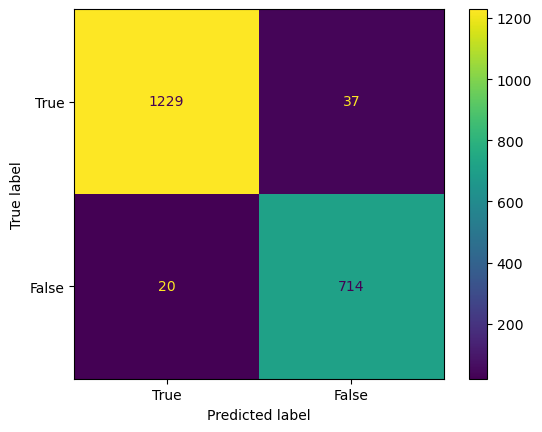

In [22]:
conf_matrix = confusion_matrix(y_test, y_preds)
print(conf_matrix)

# Create a graph of confusion matrix.
con_mat_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                              display_labels=[True, False])

# Plot the visual.
con_mat_disp.plot()
plt.grid(False)
plt.show()

#### The accuracy of the model.

In [23]:
# Print the accuracy of the model.
print("Training accuracy of the model: {0} ".format(knn2.score(X_train, y_train)))
print("Testing accuracy of the model: {0} ".format(knn2.score(X_test, y_test)))

Training accuracy of the model: 0.978875 
Testing accuracy of the model: 0.9715 


#### Calculating the AUC score and classification report.

In [24]:
y_preds_probs = knn2.predict_proba(X_test)[:, 1]

# unpack the false positive rate(fpr), true positve rate(tpr), and the threshold.
fpr, tpr, threshold = roc_curve(y_test, y_preds_probs)

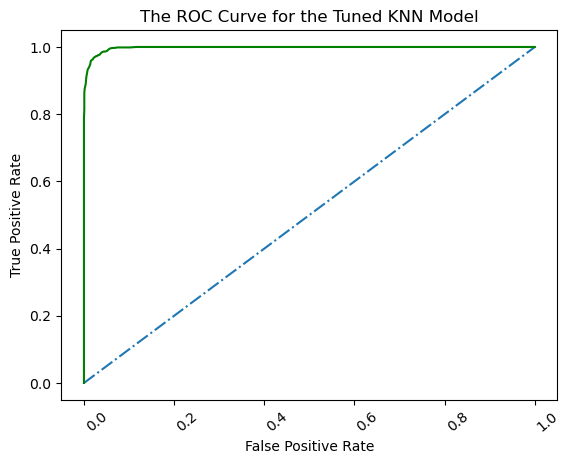

In [25]:
# Create a plot.
plt.plot([0,1], [0,1], linestyle='dashdot' )
plt.plot(fpr, tpr, color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xticks(rotation=40, ha='left')
plt.title("The ROC Curve for the Tuned KNN Model")
plt.show()


#### Print the Area Under the curve and the classification report.

In [26]:
# Print the area under the curve
print("\nThe Area Under the Curve is: {0} ".format(roc_auc_score(y_test, y_preds_probs)))

# Print the classification report.
print("\nThe classification report for the KNN model:\n\n", classification_report(y_test, y_preds))


The Area Under the Curve is: 0.997700281088713 

The classification report for the KNN model:

               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1266
           1       0.95      0.97      0.96       734

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

